# Exploring relationships in THE dataset

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path

path = r'C:\Users\skhra\DataAnalytics\THE_Rating'

In [3]:
# Import data

df = pd.read_csv(os.path.join(path, '02-Data', 'PreparedData','THE_prepared.csv'))

### 2. Data Shape

#### Renaming Columns:

In [4]:
df.shape

(14522, 14)

In [5]:
df.columns

Index(['Rank', 'Name', 'Country', 'Student Population',
       'Students to Staff Ratio', 'International Students',
       'Female to Male Ratio', 'Overall Score', 'Teaching',
       'Research Environment', 'Research Quality', 'Industry Impact',
       'International Outlook', 'Year'],
      dtype='object')

In [6]:
df.dtypes

Rank                       float64
Name                        object
Country                     object
Student Population         float64
Students to Staff Ratio    float64
International Students      object
Female to Male Ratio        object
Overall Score              float64
Teaching                   float64
Research Environment       float64
Research Quality           float64
Industry Impact            float64
International Outlook      float64
Year                         int64
dtype: object

In [7]:
df.head(5)

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243.0,6.9,26%,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920.0,11.6,34%,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596.0,7.8,22%,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810.0,11.8,34%,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074.0,9.0,33%,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


In [8]:
#Creating subset of numerical data
df_subset = df[['Rank', 'Student Population', 'Students to Staff Ratio', 'Overall Score', 'Teaching','Research Environment', 'Research Quality', 'Industry Impact', 'International Outlook']]

In [9]:
df_subset.head(5)

,Rank,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
0,1.0,2243.0,6.9,95.2,95.6,97.6,99.8,97.8,64.0
1,2.0,19920.0,11.6,94.2,86.5,98.9,98.8,73.1,94.4
2,3.0,15596.0,7.8,93.9,92.5,96.2,99.9,63.3,76.3
3,4.0,18810.0,11.8,92.8,88.2,96.7,97.0,55.0,91.5
4,5.0,11074.0,9.0,92.0,89.4,88.6,99.7,95.4,84.0


### 3. Exploring Relationships

### Correlations:

In [10]:
# Create a correlation matrix 

df_subset.corr()

,Rank,Student Population,Students to Staff Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
Rank,1.000000,0.005922,0.004559,-0.848774,-0.643042,-0.710603,-0.807047,-0.498642,-0.579548
Student Population,0.005922,1.000000,0.668730,-0.009593,-0.017517,0.017093,-0.011800,-0.001598,-0.043894
Students to Staff Ratio,0.004559,0.668730,1.000000,-0.030043,-0.125899,-0.002627,0.002607,0.012319,0.007427
Overall Score,-0.848774,-0.009593,-0.030043,1.000000,0.836970,0.899651,0.876922,0.523977,0.648760
Teaching,-0.643042,-0.017517,-0.125899,0.836970,1.000000,0.888342,0.525393,0.503855,0.375832
Research Environment,-0.710603,0.017093,-0.002627,0.899651,0.888342,1.000000,0.605334,0.586335,0.516766
Research Quality,-0.807047,-0.011800,0.002607,0.876922,0.525393,0.605334,1.000000,0.316856,0.580743
Industry Impact,-0.498642,-0.001598,0.012319,0.523977,0.503855,0.586335,0.316856,1.000000,0.258873
International Outlook,-0.579548,-0.043894,0.007427,0.648760,0.375832,0.516766,0.580743,0.258873,1.000000


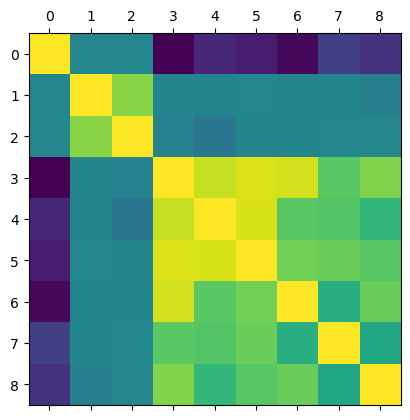

In [11]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_subset.corr())
plt.show()

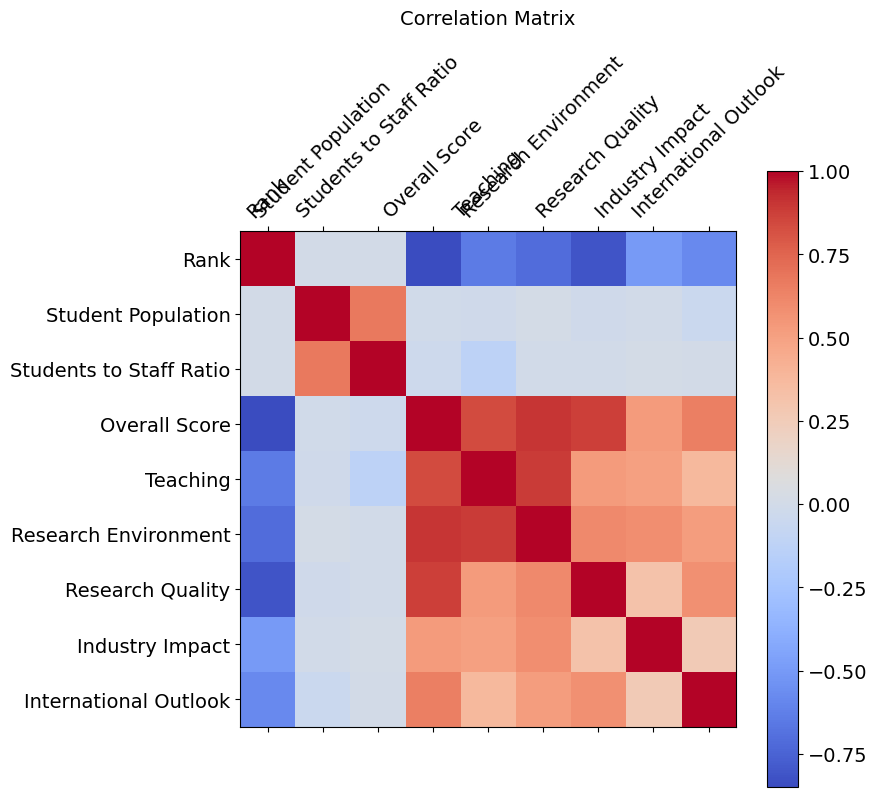

In [12]:
f = plt.figure(figsize=(8, 8))  # figure size
ax = f.add_subplot(111)  # explicit axes creation

cax = ax.matshow(df_subset.corr(), cmap='coolwarm')  # type of plot, optional colormap
plt.xticks(range(df_subset.shape[1]), df_subset.columns, fontsize=14, rotation=45)  # x axis labels
plt.yticks(range(df_subset.shape[1]), df_subset.columns, fontsize=14)  # y axis labels

cb = f.colorbar(cax)  # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14)  # add font size

plt.title('Correlation Matrix', fontsize=14, pad=20)  # add title with padding
plt.show()

#### Correlation heatmap using seaborn:

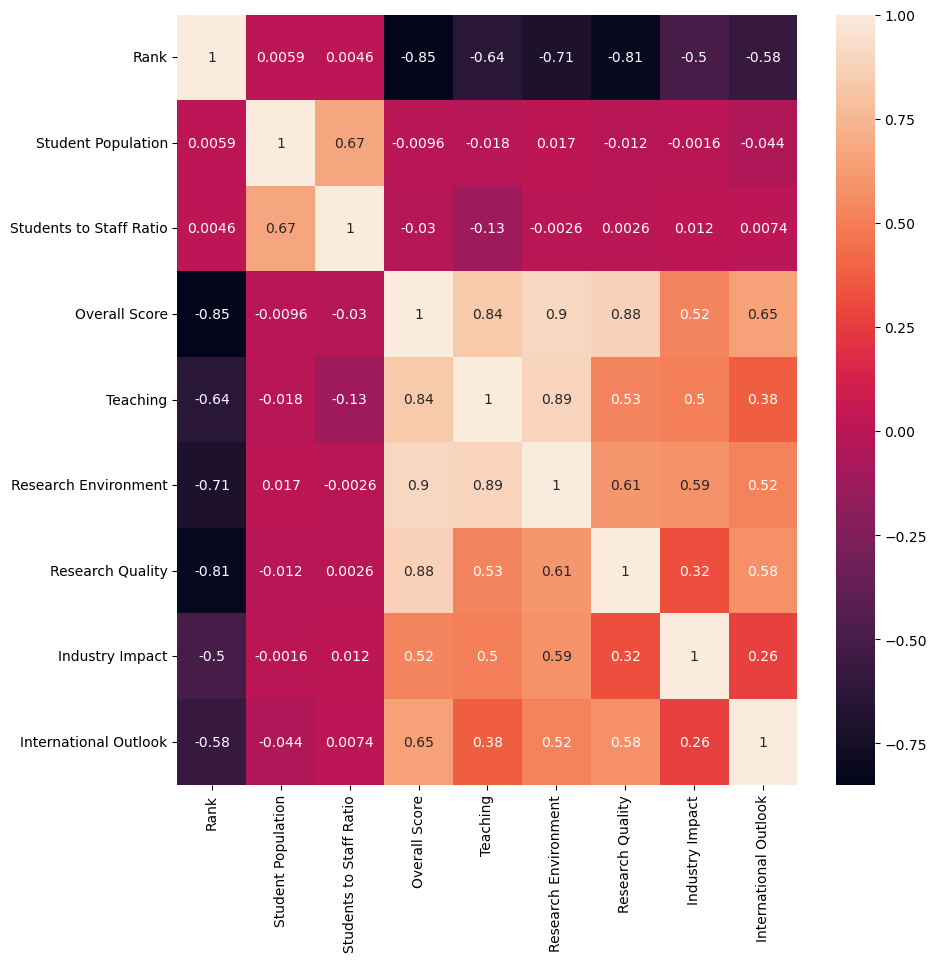

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax); 

plt.show()

### This is a very useful picture. It tells us that the rang of the university correlates very little with the number of students and student-to-staff ratio. However, there are strong negative correlations with Overall Score (obvious, this is the parameter ranking is based on), Research Quality, Research Environment, Teaching, International Outlook, and Industry Impaxt (in order of decreasing the absolute magnitude of correlatikon). This all makes perfect sense, the better the research and teaching aspects, the lower is the university rank. It is also interesting to see that the Overall Score is mostly affected by Research Environment, Research Quality, and Teaching (in order of decreasing significance).  

### Scatterplots:

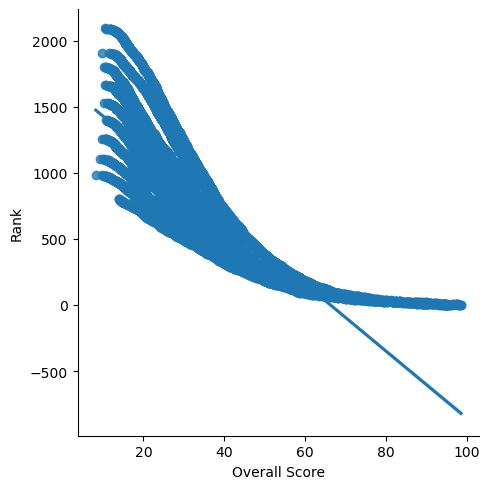

In [14]:
# Create a scatterplot for the "Rank" and "Overall Score" columns using seaborn

sns.lmplot(x = 'Overall Score', y = 'Rank', data = df_subset);

plt.show()

### Pair Plots:

In [15]:
# Keep only variables related to teaching and research

df_subset2 = df_subset[['Teaching', 'Research Environment', 'Research Quality']]

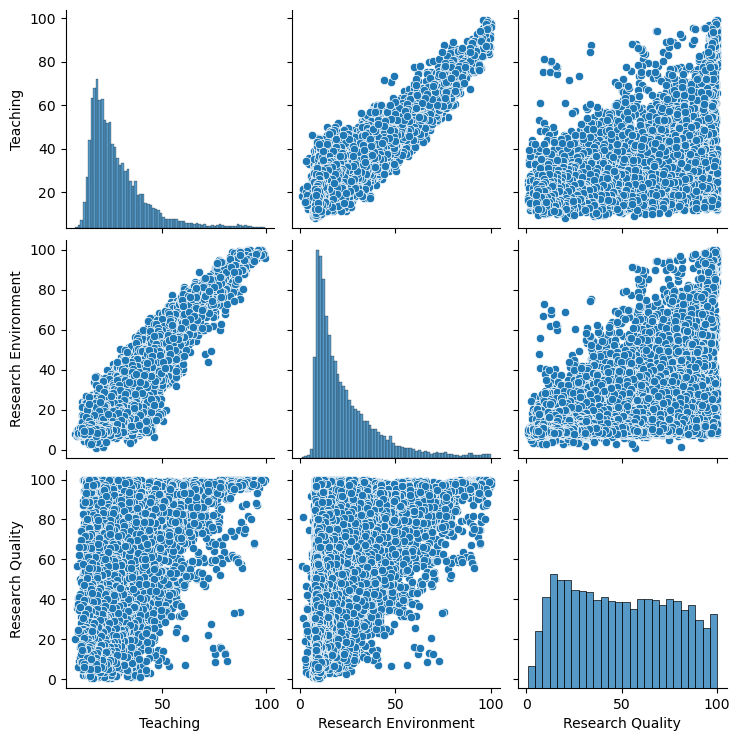

In [16]:
# Create a pair plot 

g = sns.pairplot(df_subset2)

### An interesting picture emerges here. Teaching and Research Environment are highly correlated. Teaching and Research Quality are much less correlated. Research Environment and Research Quality are also much less correlated. Teaching and Research Environment are narrowly distributed with peaks at relatively low values, so that only outstanding universities receive high values. Research Quality is much wider distributed parameter. Many universities perform research at a relatively high level. 

### Categorical Plots:

<Axes: xlabel='Overall Score', ylabel='Count'>

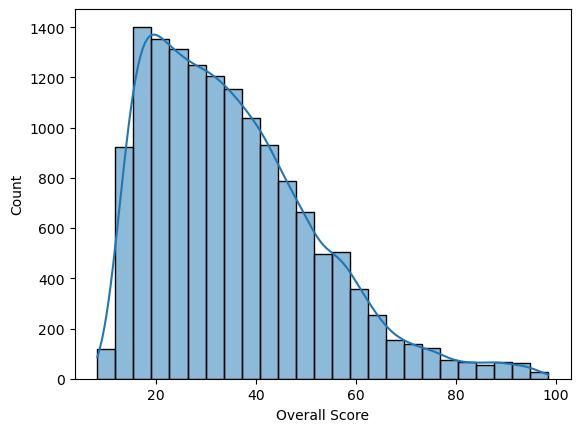

In [19]:
#Histogram of Overall Score

sns.histplot(df['Overall Score'], bins = 25, kde = True)

##### Creating a categorical variable that splits the "Price per Unit" column into categories

In [20]:
df.loc[df['Overall Score'] < 15, 'Rating category'] = 'Low rating'

In [21]:
df.loc[(df['Overall Score'] >= 15) & (df['Overall Score'] <= 40), 'Rating category'] = 'Middle rating'

In [22]:
df.loc[df['Overall Score'] > 40, 'Rating category'] = 'High rating'

In [23]:
df['Rating category'].value_counts(dropna = False)

Rating category
Middle rating    8660
High rating      4970
Low rating        892
Name: count, dtype: int64

In [24]:
df.columns

Index(['Rank', 'Name', 'Country', 'Student Population',
       'Students to Staff Ratio', 'International Students',
       'Female to Male Ratio', 'Overall Score', 'Teaching',
       'Research Environment', 'Research Quality', 'Industry Impact',
       'International Outlook', 'Year', 'Rating category'],
      dtype='object')

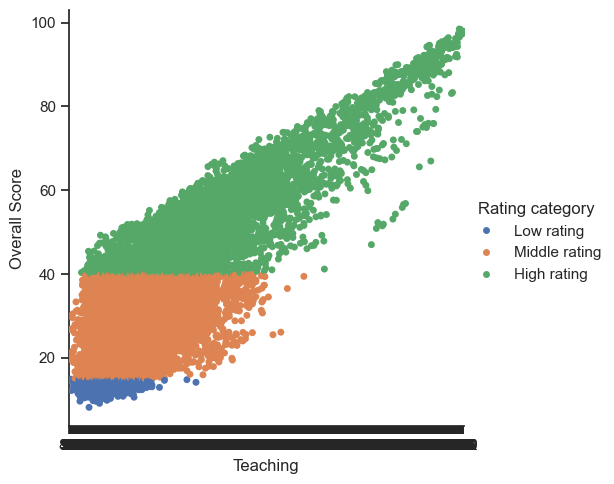

In [29]:
# Create a categorical plot in seaborn using the rating categories created above

sns.set(style="ticks")
g = sns.catplot(x="Teaching", y="Overall Score", hue="Rating category", data=df)


In [31]:
# fig = g.get_figure()
g.savefig("out.png") 

# This image will be saved in the working directory. 

### An interesting picture emerges also here. The low and middle rating universities have teaching quality bounded from above. Correlations between these two variables are week. For high rating universities correlations between the Overall Score and Teaching are much more pronounced. One can say that the Overall Score increases almost linearly with Teaching quality. 